In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load Data

In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# feature normalize each image
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
    'ship', 'truck'
]

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, 1+i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # CIFAR dataset label is designed as an array (access image using [0])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the Model
3 CNN Layers -> 1 Hidden Layer (64) -> Output Layer (10)

In [17]:
model = models.Sequential()
# CNN layers
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Fully Connected NN layers
model.add(layers.Flatten()) # input layer
model.add(layers.Dense(64, activation="relu")) # 1 hidden layer
model.add(layers.Dense(len(class_names))) # output layer which consists of 10 neurons

### Compile + Train the Model

In [18]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

cost_history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.5372 - accuracy: 0.4371 - val_loss: 1.3254 - val_accuracy: 0.5259
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.1743 - accuracy: 0.5845 - val_loss: 1.0661 - val_accuracy: 0.6253
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0209 - accuracy: 0.6408 - val_loss: 0.9807 - val_accuracy: 0.6602
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9253 - accuracy: 0.6762 - val_loss: 0.9595 - val_accuracy: 0.6662
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8489 - accuracy: 0.7028 - val_loss: 0.8956 - val_accuracy: 0.6860
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7940 - accuracy: 0.7220 - val_loss: 0.8683 - val_accuracy: 0.7019
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7473 - accuracy: 0.7381 - val_loss: 0.9198 -

313/313 - 2s - loss: 0.8979 - accuracy: 0.7011 - 2s/epoch - 5ms/step


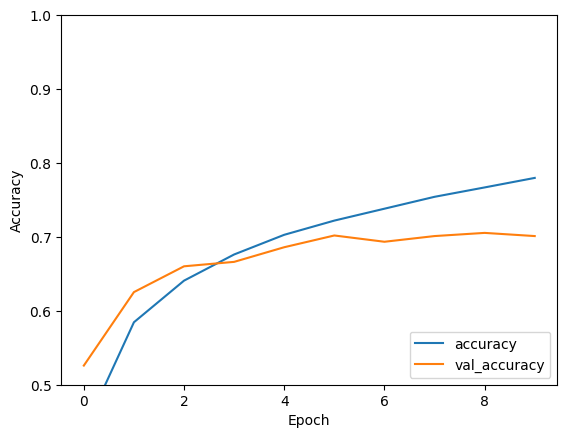

In [20]:
plt.plot(cost_history.history['accuracy'], label='accuracy')
plt.plot(cost_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


### Save the trained model


In [21]:
model_output_path = "../models/cifar10/"
model.save(model_output_path)

INFO:tensorflow:Assets written to: ../models/cifar10/assets


INFO:tensorflow:Assets written to: ../models/cifar10/assets
